In [1]:
from stesml.model_tools import final_train
from stesml.model_tools import validate_model
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import load_data

from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error

from tensorflow import keras

from stesml.stes_model import stes_model

import xgboost as xgb

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
plot = True

In [3]:
# Model names
# NN model truncated at t <= 360: 'NN_20220708-22'
# NN model for full run time: 'NN_20220708-23'
# XGBoost model for full run time 'XGBoost_20220711-1554'
# XGBoost model truncated at t >= 360 'XGBoost_20220709-0914'

In [4]:
# Train the XGBoost model for t >= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'XGBoost_20220711-1554'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = -1
truncated = False

In [5]:
parameters = stes_model.get_parameters(model_type, truncated)

In [6]:
parameters = {'learning_rate': 0.3, 'subsample': 1, 'colsample_bytree': 1, 'num_boost_round': 360}

In [13]:
train_model = False

if train_model:
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_min=t_min)


KeyboardInterrupt



In [90]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

In [7]:
load_model_and_addendum = True
    
if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [8]:
t_min = -1 # If building final model, set t_min to -1 here
h_results = validate_model(model, model_type, data_dir, target, scale, addendum, t_min)

RMSE: 2.6456137, R2: 0.9989737


In [9]:
h_df = h_results['val_df']

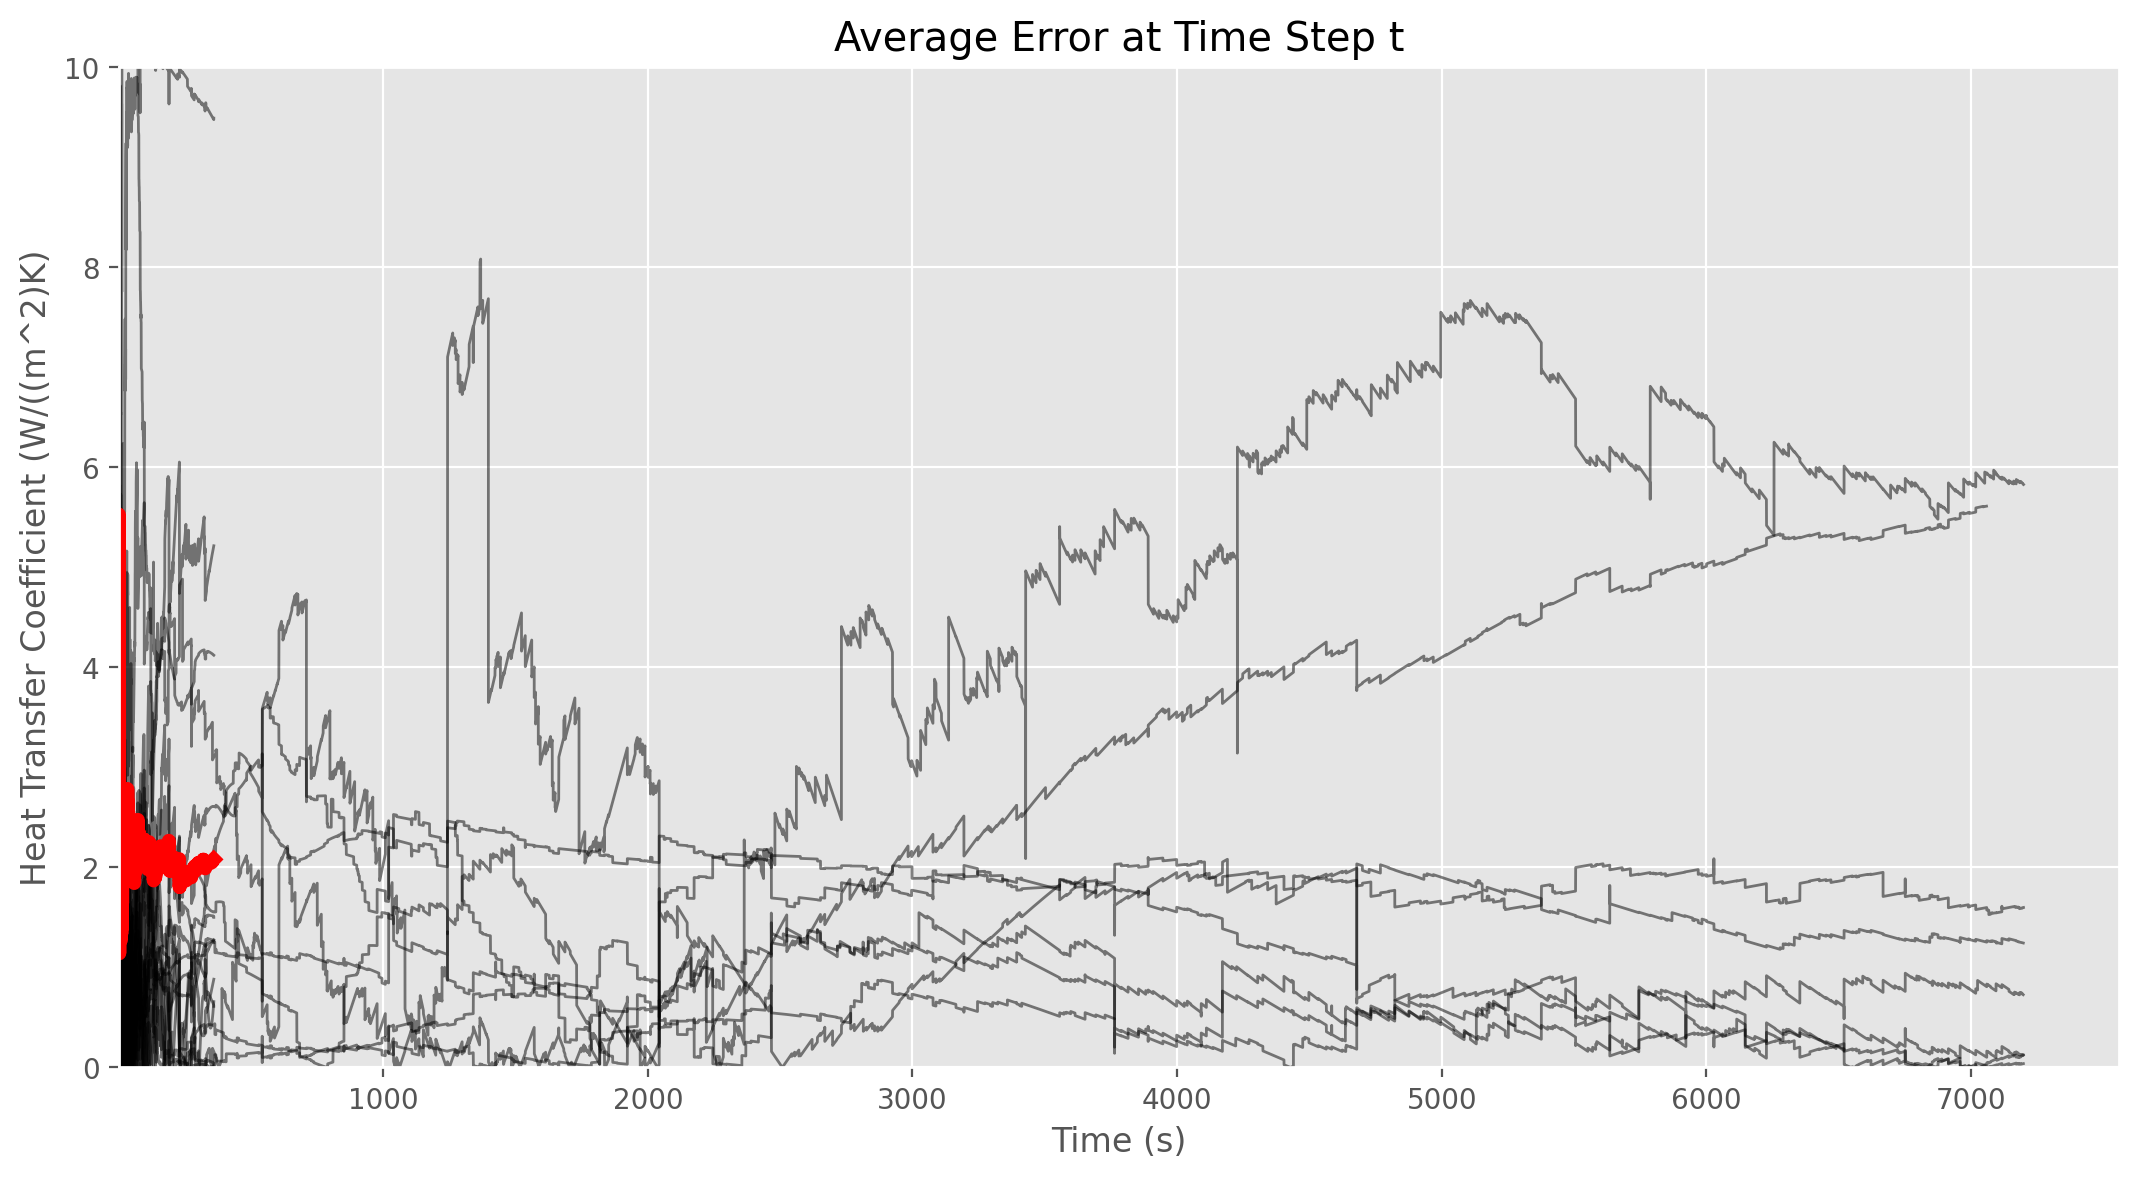

In [10]:
if plot:
    avg_error = plot_average_error(h_df, target=target, t_min=t_min)

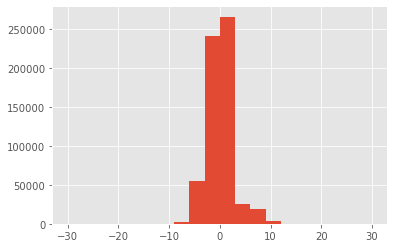

In [11]:
if plot:
    (h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

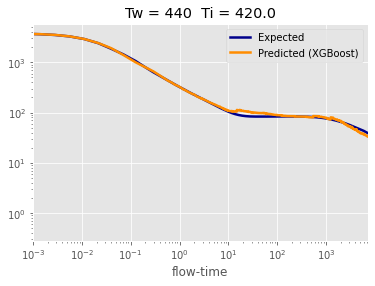

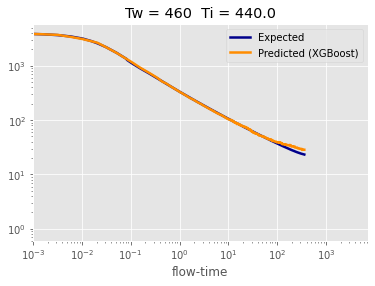

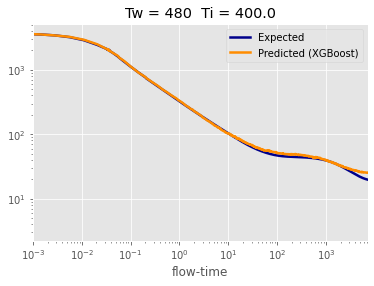

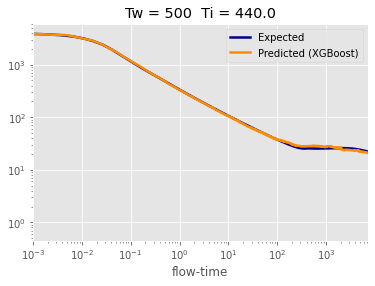

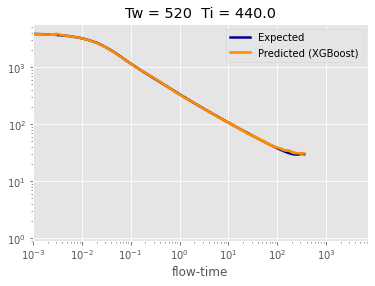

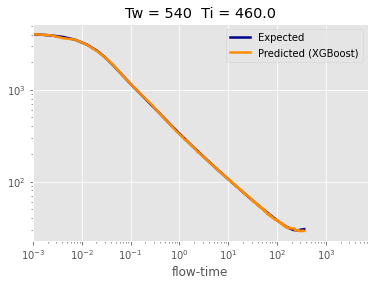

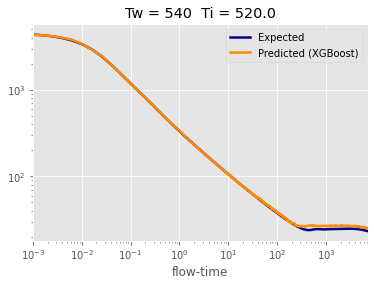

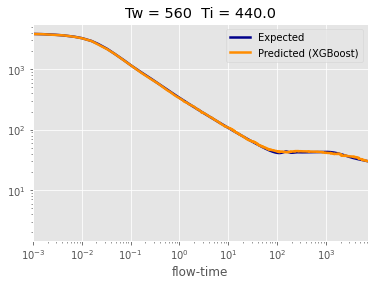

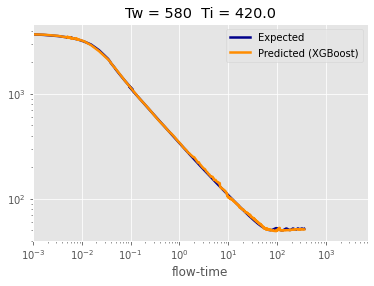

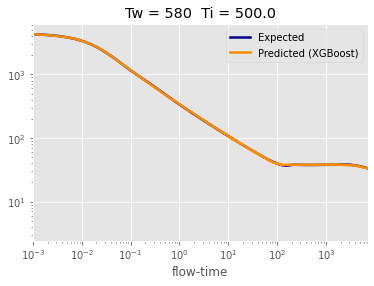

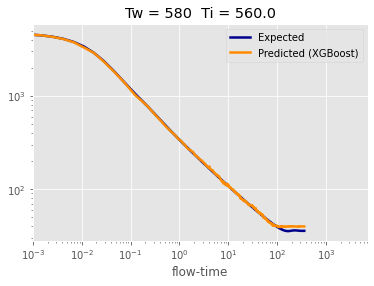

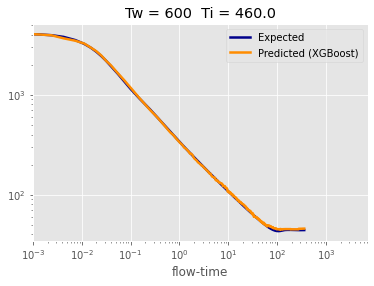

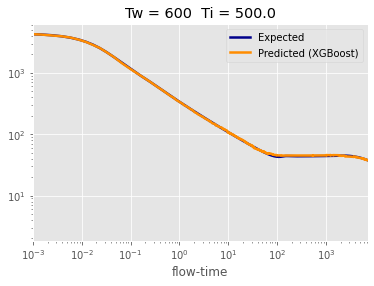

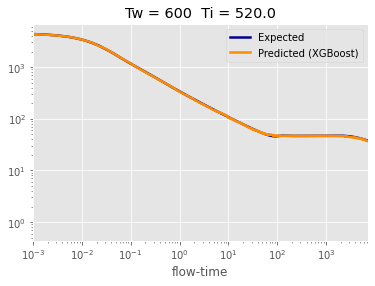

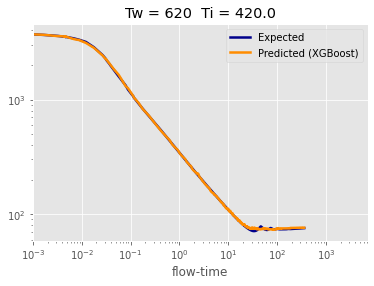

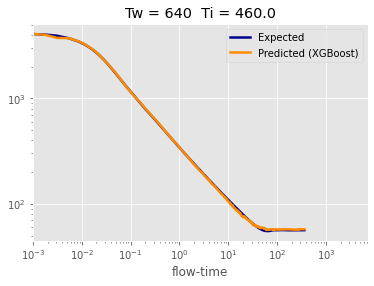

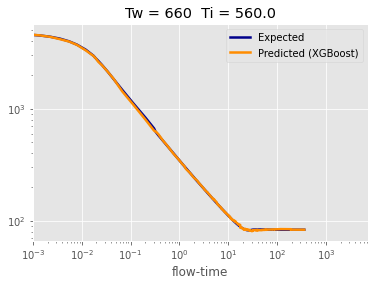

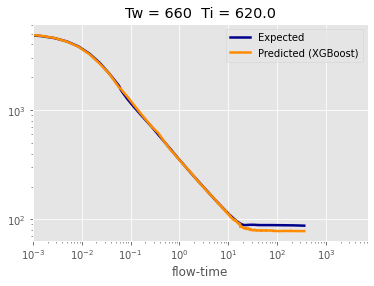

In [12]:
if plot:
    plot_test_results(h_df, model_type, target='h')

In [96]:
# Train the NN model for t <= 360

data_dir = "../data/Sulfur_Models/heating/heating_all"
model_name = 'NN_20220708-22'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1
t_max=360
truncated=True

In [97]:
train_model = False

if train_model:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = final_train(data_dir, model_type, target, scale, parameters, t_max=t_max)

In [98]:
save_model_and_addendum = False

if save_model_and_addendum:
    stes_model.save_model(model, model_type, addendum)

In [99]:
load_model_and_addendum = True

if load_model_and_addendum:
    model, addendum = stes_model.load_model(model_type, model_name)

In [100]:
t_max = -1 # If building final model, set t_max to -1 here
T_results = validate_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

RMSE: 118.8024065, R2: -4.9438996


In [101]:
T_df = T_results['val_df']

In [102]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

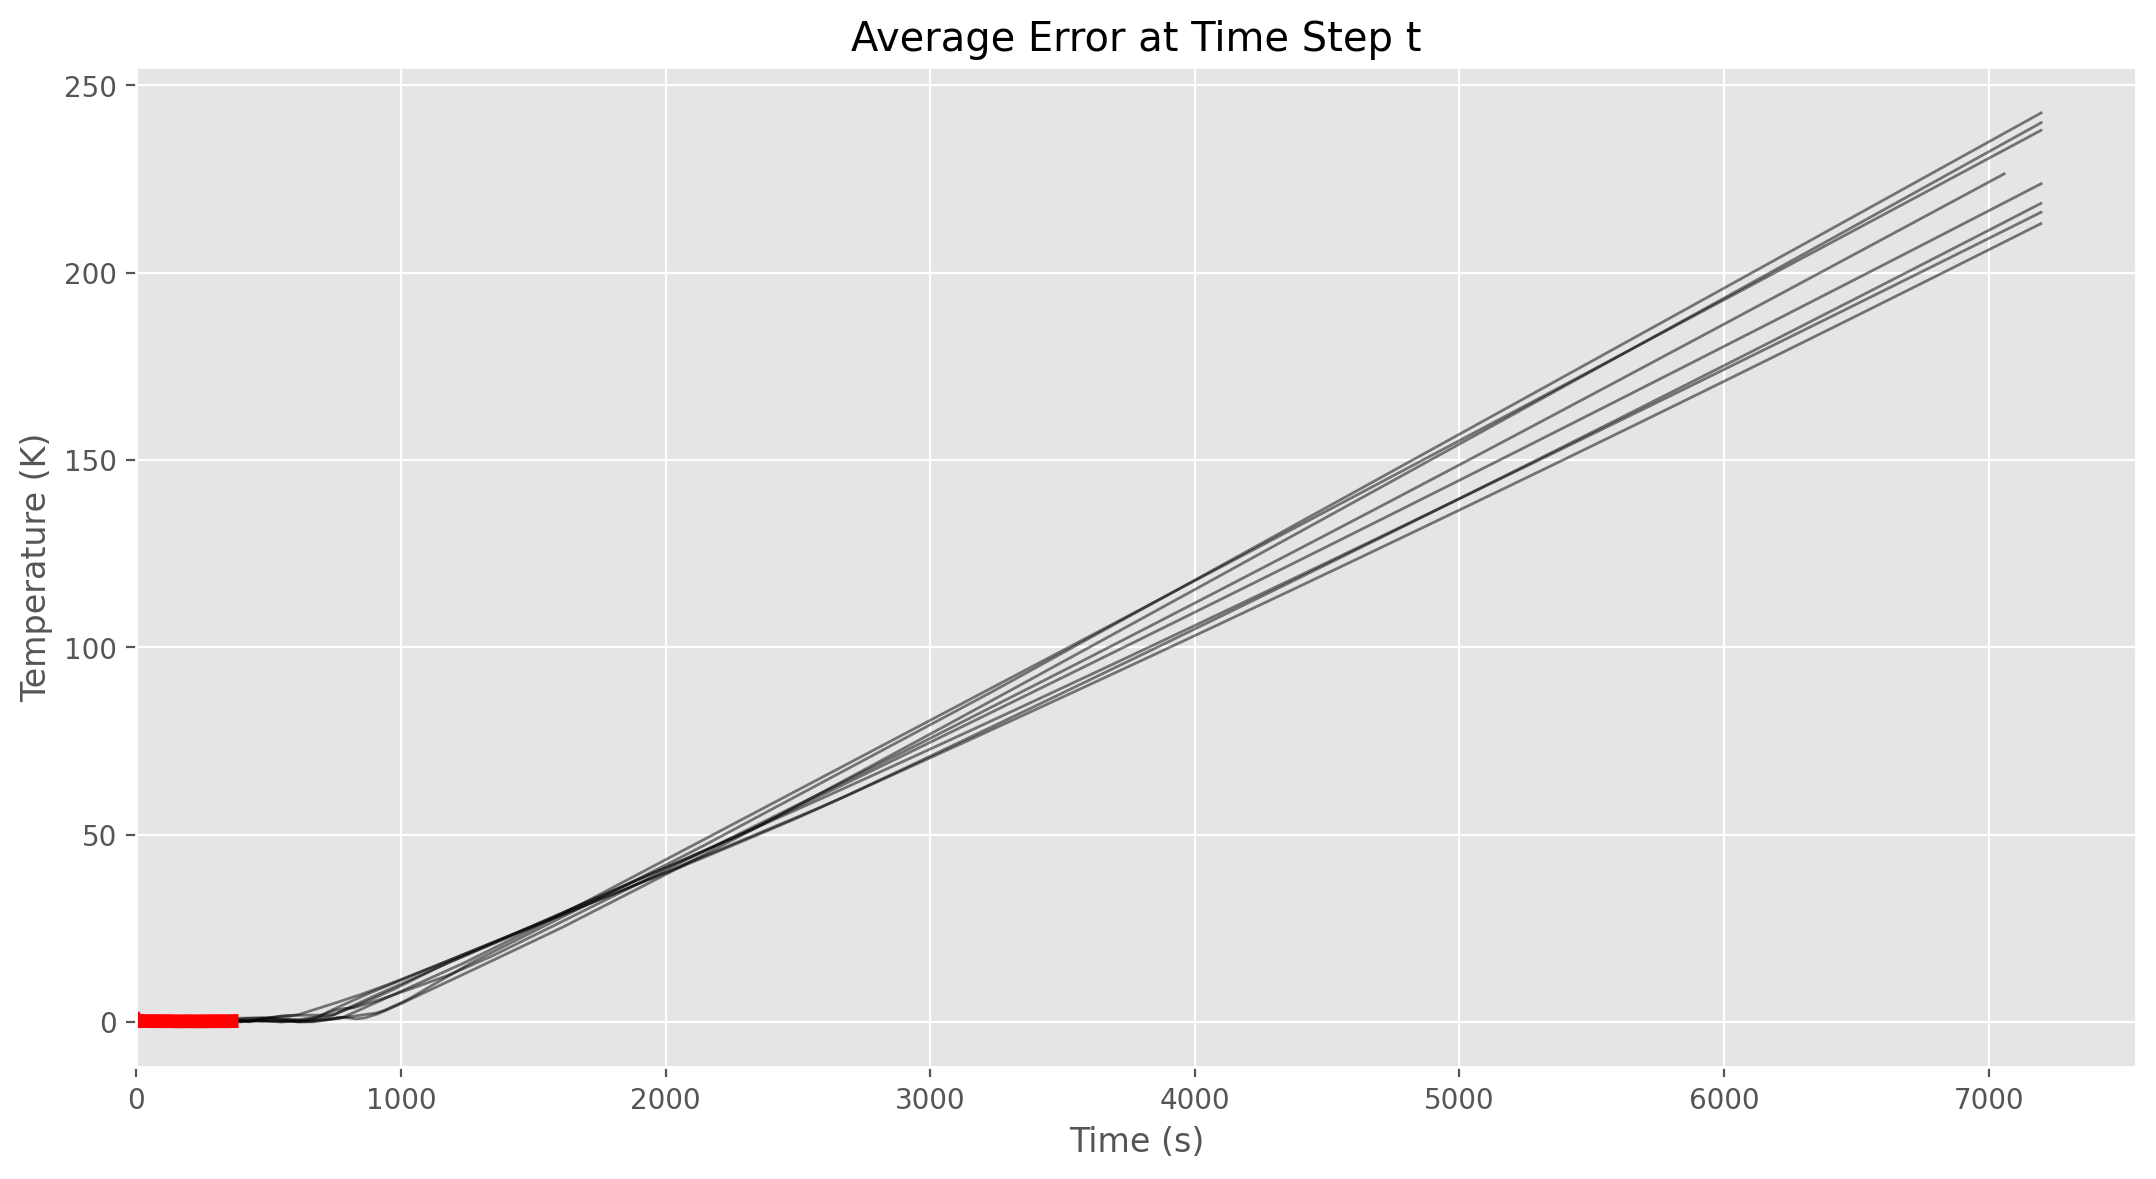

In [45]:
if plot:
    avg_error = plot_average_error(T_df, target=target, t_max=t_max)

In [23]:
if plot:
    (T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

In [24]:
if plot:
    plot_test_results(T_df, model_type, target='Tavg')

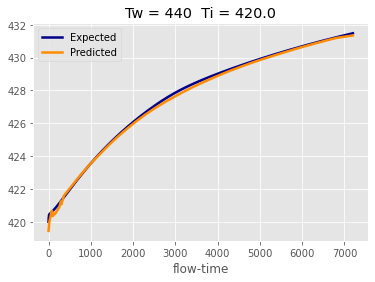

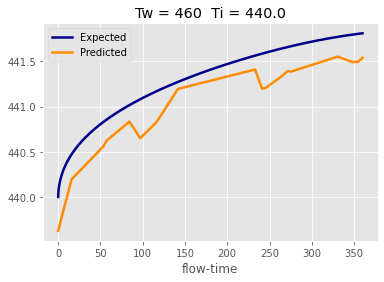

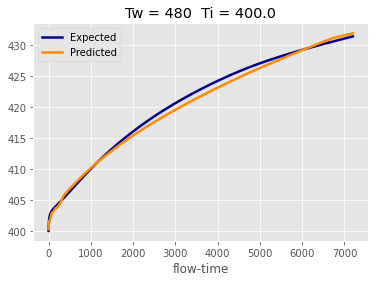

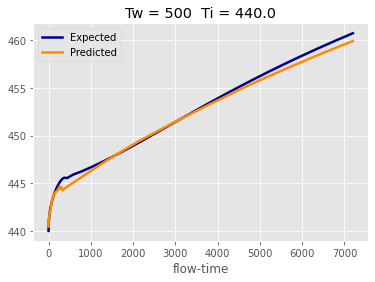

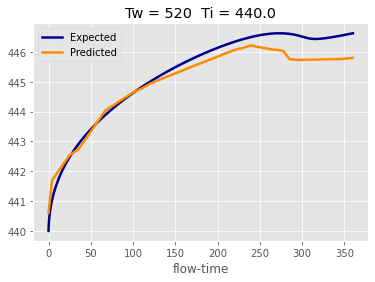

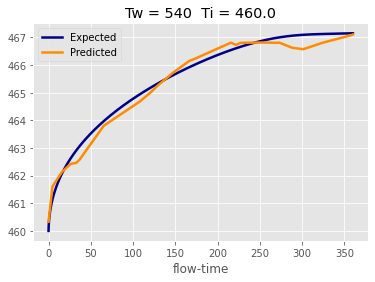

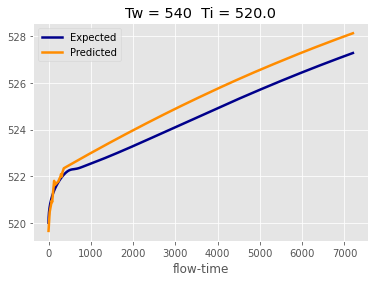

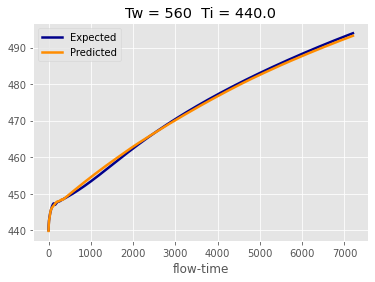

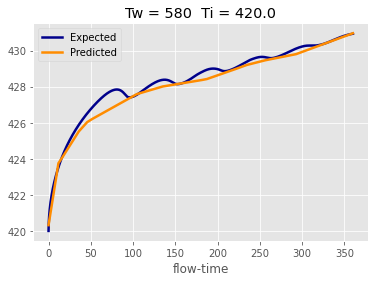

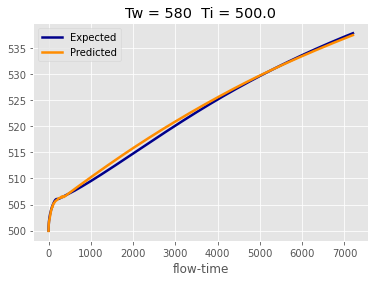

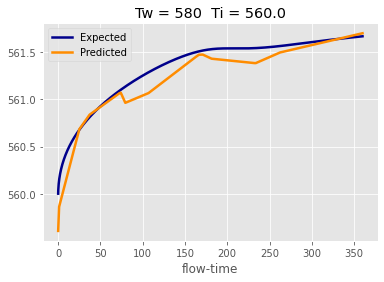

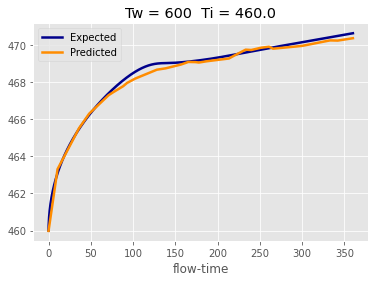

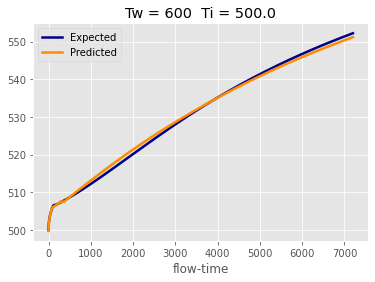

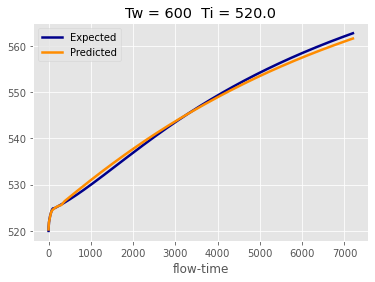

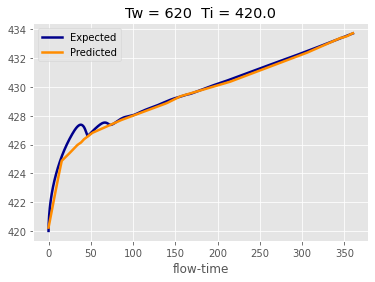

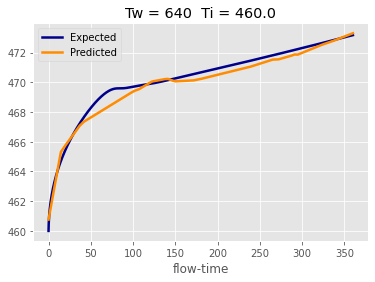

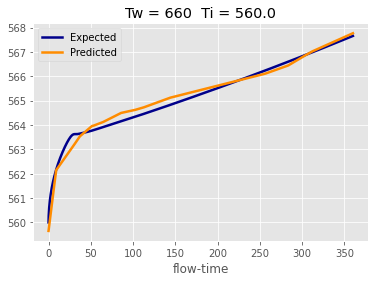

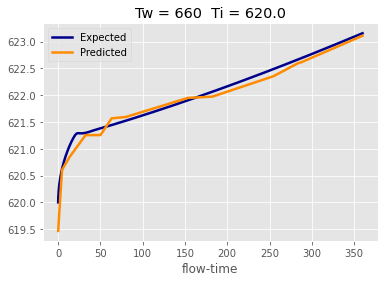

In [103]:
rmse, r2 = get_T_from_h_results(h_df, plot=True)

In [104]:
print(rmse)

0.613081243074801


In [105]:
print(r2)

0.9998417086982592
